#### libraries:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### load the dataset:

In [20]:
file_path = r"C:\Users\Admin\Desktop\ML\mtcars.xlsx.csv"
df = pd.read_csv(file_path)
print(df.head())

    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB
None


In [22]:
print(df.describe())

             mpg        cyl         disp          hp       drat         wt  \
count  32.000000  32.000000    32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500   261.971875  146.687500   3.596563   3.217250   
std     6.026948   1.785922   249.353425   68.562868   0.534679   0.978457   
min    10.400000   4.000000    71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000   120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000   196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000   326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  1472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1

In [23]:
print(df.isnull().sum())

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64


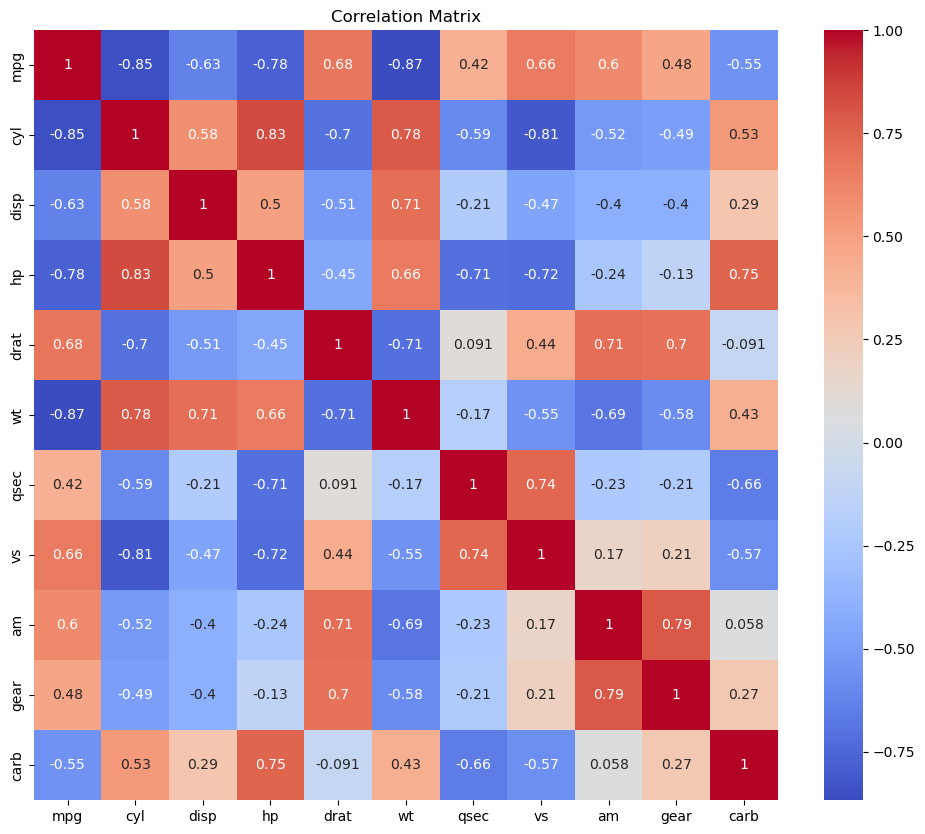

In [24]:
# correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### data Preparation:

In [25]:
# separate features and target variable
X = df.drop('mpg', axis=1)
y = df['mpg']

In [26]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### modeling:

In [28]:
# create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
# make predictions
y_pred = model.predict(X_test_scaled)

In [30]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 8.590187415300743
R-squared Score: 0.7851598169936319


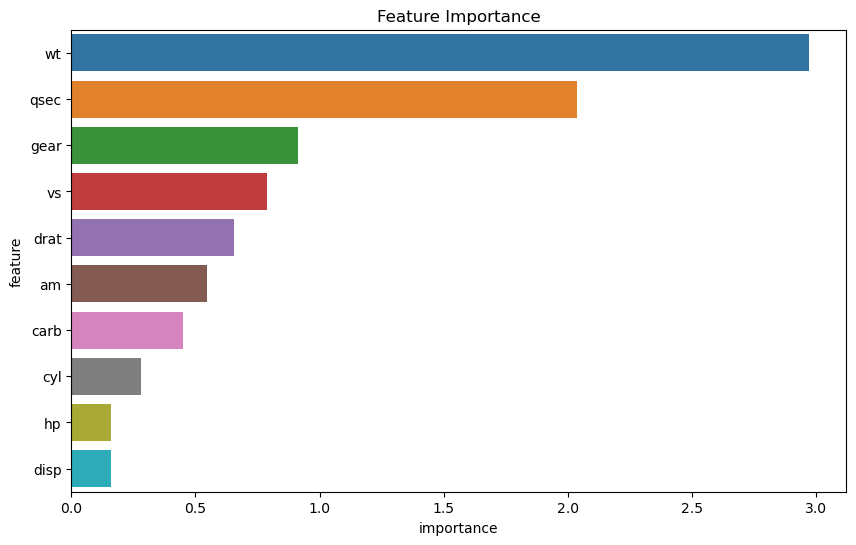

In [32]:
# display feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

#### evaluation:

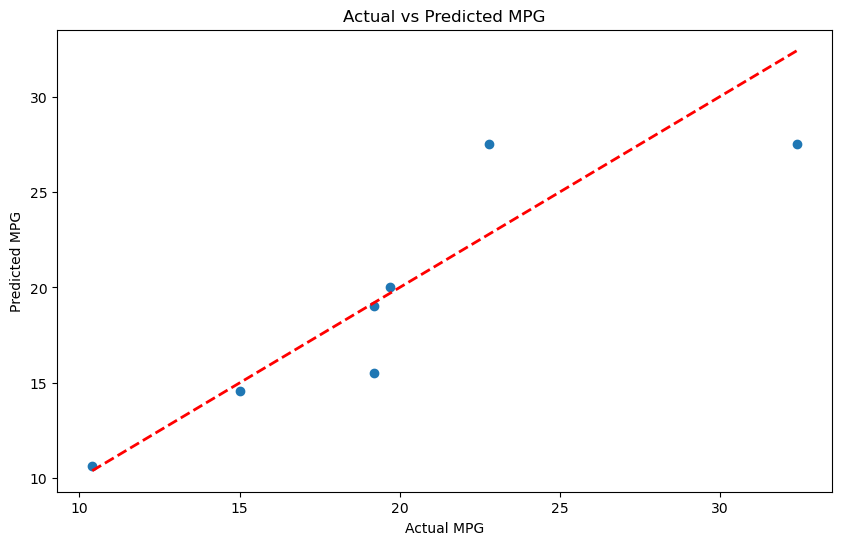

In [33]:
# scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.show()

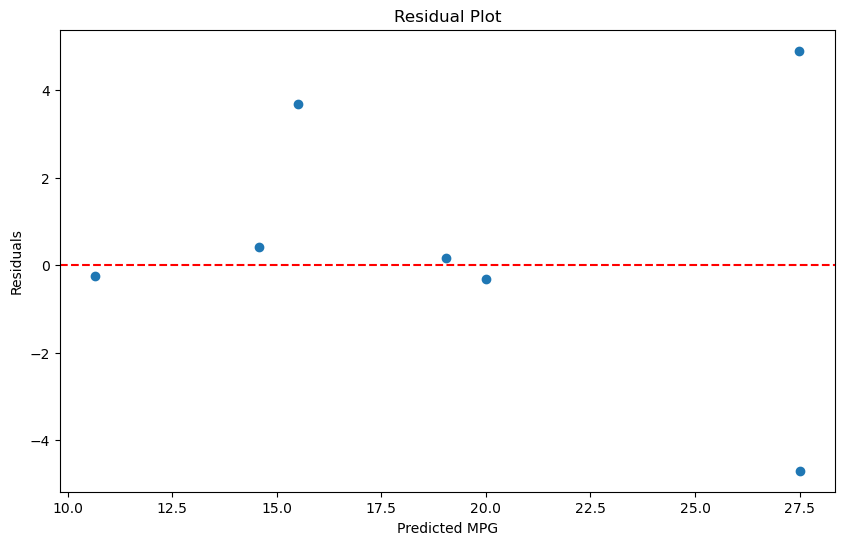

In [34]:
# residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#### deployment:

In [18]:
import joblib

# save the model
joblib.dump(model, 'mpg_prediction_model.joblib')

# save the scaler
joblib.dump(scaler, 'mpg_prediction_scaler.joblib')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [37]:
from jinja2 import Template

html_template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>MPG Prediction Project Report</title>
</head>
<body>
    <h1>MPG Prediction Project Report</h1>
    <h2>Model Performance</h2>
    <p>Mean Squared Error: {{ mse }}</p>
    <p>R-squared Score: {{ r2 }}</p>
    <h2>Feature Importance</h2>
    <img src="feature_importance.png" alt="Feature Importance">
    <h2>Actual vs Predicted MPG</h2>
    <img src="actual_vs_predicted.png" alt="Actual vs Predicted MPG">
    <h2>Residual Plot</h2>
    <img src="residual_plot.png" alt="Residual Plot">
</body>
</html>
"""

template = Template(html_template)
html_content = template.render(mse=mse, r2=r2)

with open('mpg_prediction_report.html', 'w') as f:
    f.write(html_content)

print("HTML report generated successfully.")

HTML report generated successfully.
